In [1]:
%matplotlib inline

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
exp1dict = {}
exp1adict = {}

In [4]:
def findBest(foldername, errDict):
    flist = glob.glob("./%s/*.pkl" % foldername)
    print("number of exp: %d" % len(flist))
    bestTrain = 1000
    bestTrainFile = ''
    bestVal = 1000
    bestValFile = ''
    avValErr = 0
    count = 0
    # loop through all the .pkl files from experiments you've saved in this folder
    for j in flist:
        # if it's not already in the dictionary (newer than the last time you ran this cell), try to add it
        if j not in errDict:
            try:
                with open(j, 'rb') as f:
                    params = pickle.load(f, encoding='latin1')
            except:
                print("Couldn't open %s" % j)
                continue
            minTrain = params['minTrain']
            minVal = params['minTest'] # this is actually validation error
            errDict[j] = [minTrain, minVal]
        else:
            minTrain = errDict[j][0]
            minVal = errDict[j][1]
        # track the best training error and best validation error as you go
        if minTrain < bestTrain:
            bestTrain = minTrain
            bestTrainFile = j
        if minVal < bestVal:
            bestVal = minVal
            bestValFile = j
            try:
                print("new best, stop condition: %s, log10(val. error) = %.12f" % (params['stop_condition'], np.log10(bestVal)))
            except:
                print("new best, no stop condition, log10(val. error) = %.12f" % np.log10(bestVal))
        if not np.isnan(minVal):
            avValErr += minVal
            count +=1 
    avValErr = avValErr/count
    print()
    print("best training error: %.12f \nat %s" % (bestTrain, bestTrainFile))
    print()
    print("best validation error: %.12f \nat %s" % (bestVal, bestValFile))
    print()
    # note that since these errors can vary by order of magnitudes, this average is probably dominated by some really bad runs
    print("average val. error: %.12f" % (avValErr))
    return errDict

In [5]:
exp1dict = findBest('exp1', exp1dict) 

number of exp: 55
new best, no stop condition, log10(val. error) = -7.016472664619
new best, no stop condition, log10(val. error) = -7.483233752841

best training error: 0.000000027861 
at ./exp1/DiscreteSpectrumExample_2019_01_05_11_20_55_106488_model.pkl

best validation error: 0.000000032867 
at ./exp1/DiscreteSpectrumExample_2019_01_05_11_20_55_106488_model.pkl

average val. error: 0.010668108504


In [ ]:
exp1adict = findBest('exp1a', exp1adict) # can compare a different experiment (separate folders of results)

In [6]:
# Example code if you're curious how many trials had good error (i.e. not just best run, but all the ones under
# your "good" threshold

foldername = 'exp1'
flist = glob.glob("./%s/*.pkl" % foldername)

good = .0000001 # error that you consider pretty good

for j in flist:
    try:
        with open(j, 'rb') as f:
            params = pickle.load(f, encoding='latin1')            
    except:
        print("Couldn't open %s" % j)
        continue
    minVal = params['minTest']
    if minVal < good:
        print("%s final: %.12f" % (j, minVal))

./exp1/DiscreteSpectrumExample_2019_01_04_07_53_26_939881_model.pkl final: 0.000000096278
./exp1/DiscreteSpectrumExample_2019_01_05_11_20_55_106488_model.pkl final: 0.000000032867
./exp1/DiscreteSpectrumExample_2019_01_04_16_36_22_920902_model.pkl final: 0.000000073427


In [7]:
# example code to explore good heuristic thresholds for how low the error should be each time we check during training
foldername = 'exp1'
flist = glob.glob("./%s/*.pkl" % foldername)

for j in flist:
    try:
        with open(j, 'rb') as f:
            params = pickle.load(f, encoding='latin1')            
    except:
        print("Couldn't open %s" % j)
        continue
    minVal = params['minTest']
    if minVal < .000009: # or compare to some "average" trial so far? 
        print("%s final:%.3E \n\t20 min: %.6f, 40 min: %.6f, 1 hr: %.6f, 2 hr: %.6f, 3 hr: %.6f, 4 hr: %.6f" % (j, minVal, params['been20min'], params['been40min'], params['been1hr'], params['been2hr'], params['been3hr'], params['been4hr']))

./exp1/DiscreteSpectrumExample_2019_01_04_07_53_26_939881_model.pkl final:9.628E-08 
	20 min: 0.000001, 40 min: 0.000000, 1 hr: 0.000000, 2 hr: 0.000000, 3 hr: 0.000000, 4 hr: 0.000000
./exp1/DiscreteSpectrumExample_2019_01_05_11_20_55_106488_model.pkl final:3.287E-08 
	20 min: 0.000013, 40 min: 0.000003, 1 hr: 0.000001, 2 hr: 0.000000, 3 hr: 0.000000, 4 hr: 0.000000
./exp1/DiscreteSpectrumExample_2019_01_04_16_36_22_920902_model.pkl final:7.343E-08 
	20 min: 0.000001, 40 min: 0.000000, 1 hr: 0.000000, 2 hr: 0.000000, 3 hr: 0.000000, 4 hr: 0.000000
./exp1/DiscreteSpectrumExample_2019_01_04_23_15_54_075674_model.pkl final:2.928E-07 
	20 min: 0.000017, 40 min: 0.000003, 1 hr: 0.000001, 2 hr: 0.000001, 3 hr: 0.000000, 4 hr: 0.000000
./exp1/DiscreteSpectrumExample_2019_01_05_14_42_19_761016_model.pkl final:1.650E-07 
	20 min: 0.000171, 40 min: 0.000045, 1 hr: 0.000014, 2 hr: 0.000002, 3 hr: 0.000001, 4 hr: 0.000000
./exp1/DiscreteSpectrumExample_2019_01_04_19_14_18_036076_model.pkl final:4

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log10
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log10
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log10
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log10


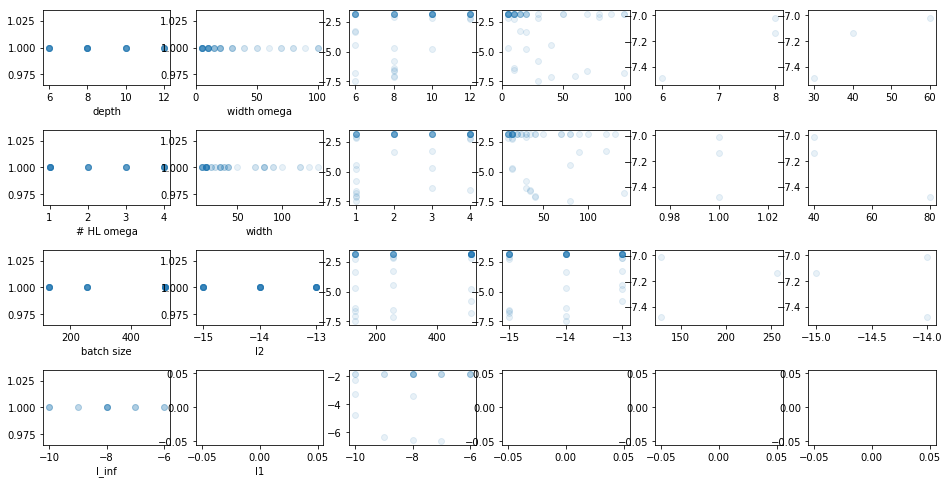

In [8]:
# one way to create some plots to compare hyperparameters and validation error
flist = glob.glob("./exp1/*.pkl")

param_array = np.zeros((len(flist), 10))
count = 0
for j in flist:
    with open(j, 'rb') as f:
        params = pickle.load(f, encoding='latin1')
        param_array[count, 0] = params['d']
        wo = params['hidden_widths_omega'][0]
        param_array[count, 1] = wo
        param_array[count, 2] = len(params['hidden_widths_omega'])
        w = params['widths'][1]
        param_array[count, 3] = w
        param_array[count, 4] = params['batch_size']
        param_array[count, 5] = params['L2_lam']
        param_array[count, 6] = params['Linf_lam']
        param_array[count, 7] = params['L1_lam']
        param_array[count, 8] = params['minTest']
    try:
        sc = params['stop_condition']
        if sc != 'too slowly improving in first 5 min':
            # these ones ran for more than 5 minutes
            param_array[count, 9] = 1
    except KeyError:
        # also ran for a while
        param_array[count, 9] = 1 
    count += 1

bestErr = np.nanmin(param_array[:,8])
bestInd = np.nonzero(param_array[:,8] < 5*bestErr)
    
f, ax = plt.subplots(4,6)
f.set_figwidth(16)
f.set_figheight(8)

# first two columns: compare the hyperparameters that meant training quit after 5 minutes (param_array[:, 9] = 0)
# versus the ones that made it past that first threshold (param_array[:, 9] = 1)
# might suggest some very bad hyperparameter settings
ax[0,0].scatter(param_array[:,0], param_array[:,9], alpha=0.1)
ax[0,0].set_xlabel('depth')
ax[0,1].scatter(param_array[:,1], param_array[:,9], alpha=0.1)
ax[0,1].set_xlabel('width omega')
ax[1,0].scatter(param_array[:,2], param_array[:,9], alpha=0.1)
ax[1,0].set_xlabel('# HL omega')
ax[1,1].scatter(param_array[:,3], param_array[:,9], alpha=0.1)
ax[1,1].set_xlabel('width')
ax[2,0].scatter(param_array[:,4], param_array[:,9], alpha=0.1)
ax[2,0].set_xlabel('batch size')
ax[2,1].scatter(np.log10(param_array[:,5]), param_array[:,9], alpha=0.1)
ax[2,1].set_xlabel('l2')
ax[3,0].scatter(np.log10(param_array[:,6]), param_array[:,9], alpha=0.1)
ax[3,0].set_xlabel('l_inf')
ax[3,1].scatter(np.log10(param_array[:,7]), param_array[:,9], alpha=0.1)
ax[3,1].set_xlabel('l1')

# next two columns: look for patterns between validation error and hyperparameter choices
ax[0,2].scatter(param_array[:,0], np.log10(param_array[:,8]), alpha=0.1)
ax[0,3].scatter(param_array[:,1], np.log10(param_array[:,8]), alpha=0.1)
ax[1,2].scatter(param_array[:,2], np.log10(param_array[:,8]), alpha=0.1)
ax[1,3].scatter(param_array[:,3], np.log10(param_array[:,8]), alpha=0.1)
ax[2,2].scatter(param_array[:,4], np.log10(param_array[:,8]), alpha=0.1)
ax[2,3].scatter(np.log10(param_array[:,5]), np.log10(param_array[:,8]), alpha=0.1)
ax[3,2].scatter(np.log10(param_array[:,6]), np.log10(param_array[:,8]), alpha=0.1)
ax[3,3].scatter(np.log10(param_array[:,7]), np.log10(param_array[:,8]), alpha=0.1)

# final two columns: look for patterns just among the very best runs
ax[0,4].scatter(param_array[bestInd,0], np.log10(param_array[bestInd,8]), alpha=0.1)
ax[0,5].scatter(param_array[bestInd,1], np.log10(param_array[bestInd,8]), alpha=0.1)
ax[1,4].scatter(param_array[bestInd,2], np.log10(param_array[bestInd,8]), alpha=0.1)
ax[1,5].scatter(param_array[bestInd,3], np.log10(param_array[bestInd,8]), alpha=0.1)
ax[2,4].scatter(param_array[bestInd,4], np.log10(param_array[bestInd,8]), alpha=0.1)
ax[2,5].scatter(np.log10(param_array[bestInd,5]), np.log10(param_array[bestInd,8]), alpha=0.1)
ax[3,4].scatter(np.log10(param_array[bestInd,6]), np.log10(param_array[bestInd,8]), alpha=0.1)
ax[3,5].scatter(np.log10(param_array[bestInd,7]), np.log10(param_array[bestInd,8]), alpha=0.1)

f.subplots_adjust(hspace=0.6)